#### This notebook walks through how to create nice looking visualizations of gridded global datasets using Python's __Xarray & Cartopy__ packages. We work with NOAA's OI SST Monthly Long Term Mean 1991-2020 DataSet from https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html.

#### __Authors__: Dr. Rebecca L. Beadling. For any questions regarding the contents of this notebook please contact rebecca.beadling@temple.edu or william.ellinger@temple.edu.

#### You should be __entering__ this lesson with ...
* Having worked through all of the exercises in the Xarray_Fundamentals and Weighted_Averages_Spatial notebooks.
* Knowledge of Matplotlib's object-oriented plotting! (review this if needed - the notebook is on your GitHub / in your Unit3 repo)

#### You should be __leaving__ this lesson with ...
* Knowledge of how to create global maps.
* Knowledge of how to adjust color maps.
* How to customize plots with gridlines / coastlines / shaded land.
* How to create maps in using different map projections.


In [2]:
import matplotlib.pyplot as plt 
import xarray as xr
import numpy as np 

### Note these new packages that we are importing!!
import cartopy.crs as ccrs   ## for plotting 
import cmocean               ## for nice colormaps!

In [3]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  

#### Load the Dataset that we will be working with for this plotting lesson:

In [5]:
## Load a dataset of sea surface temperature (SST) from OISST and assign to a variable called SST_OISST:
SST_OISST = xr.open_dataset('/home/tu.temple.edu/tuq41374/courses/EES3506_5506_Fall2023_Unit4/data/sst.oisst.mon.ltm.1991-2020.nc')

In [6]:
SST_OISST

<xarray.Dataset>
Dimensions:             (lat: 180, lon: 360, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time                (time) datetime64[ns] 1991-01-01 ... 1991-12-01
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    sst                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes: (12/13)
    CDI:                            Climate Data Interface version 1.9.10 (ht...
    source:                         NOAA/NCEI https://www.ncei.noaa.gov/data/...
    institution:                    NOAA/National Centers for Environmental I...
    Conventions:                    CF-1.5
    title:                          NOAA/NCEI 1/4 Degree Daily Optimum Interp...
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    ...                             ...
    version:                        Version 2.1
    comment:                        Reynolds, et al.(2007) Daily High-Resolut...
    CDO:                            Climate Data Operators version 1.9.10 (ht...
    history:                        Created 2023/08/08 by doMonthLTMNC4
    NCO:                            netCDF Operators version 4.8.1 (Homepage ...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...

#### In this lesson we will be working with the Cartopy Python package that is designed for producing maps and doing other geospatial analysis. It makes producing maps __easy__! 
![](https://pypi-camo.global.ssl.fastly.net/ba5e90f299bbc5539b2bbba4514d367a1ad6bec3/68747470733a2f2f736369746f6f6c732e6f72672e756b2f636172746f70792f646f63732f6c61746573742f5f7374617469632f636172746f70792e706e67)

In [7]:
SST = SST_OISST.sst  ## Extract our DataArray that we will be working with.

#### You have already learned how to make a quick and dirty plot using Xarray's `.plot()` method in the previous excercises in this unit:

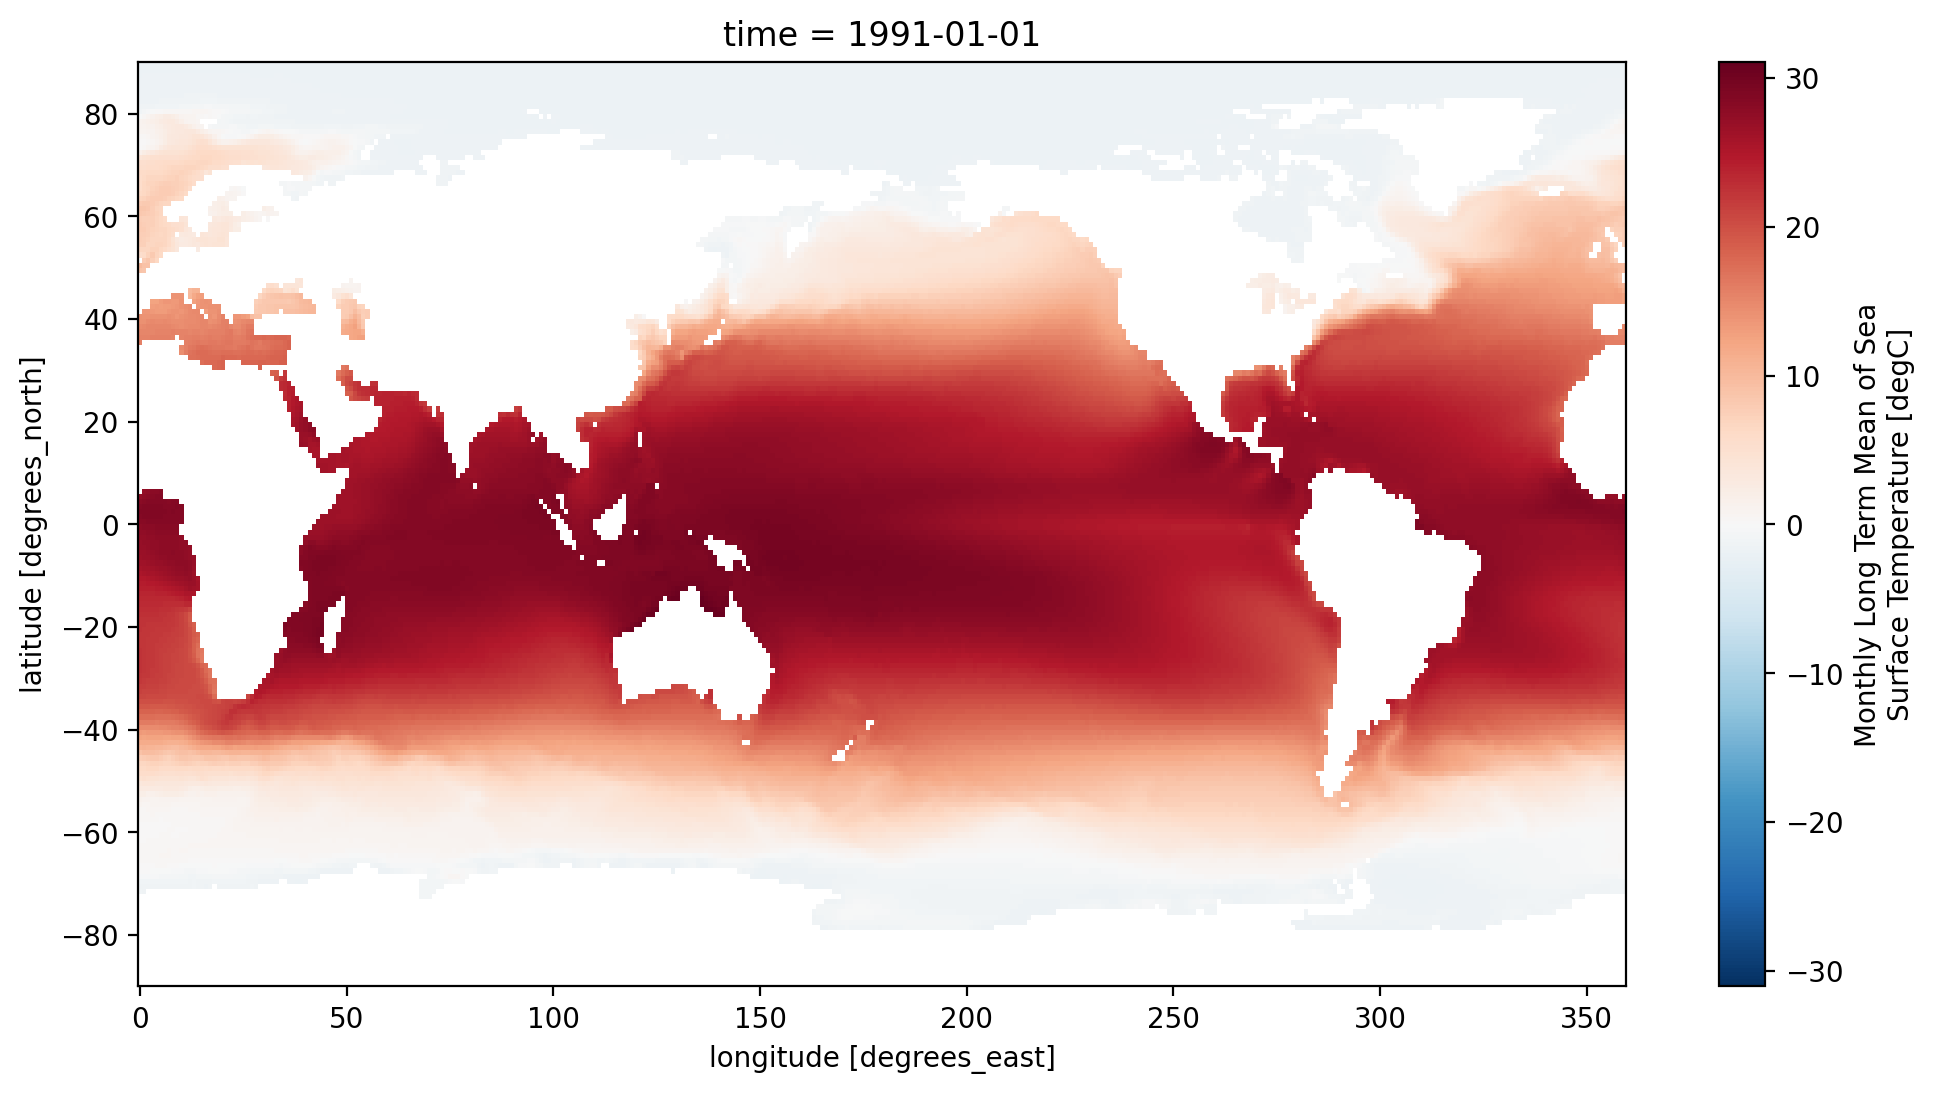

In [8]:
SST.sel(time='1991-01-01').plot()

#### We have also seen that we can use this `.plot()` method with our usual `fig, ax = plt.subplots()` method for setting up our Figure:

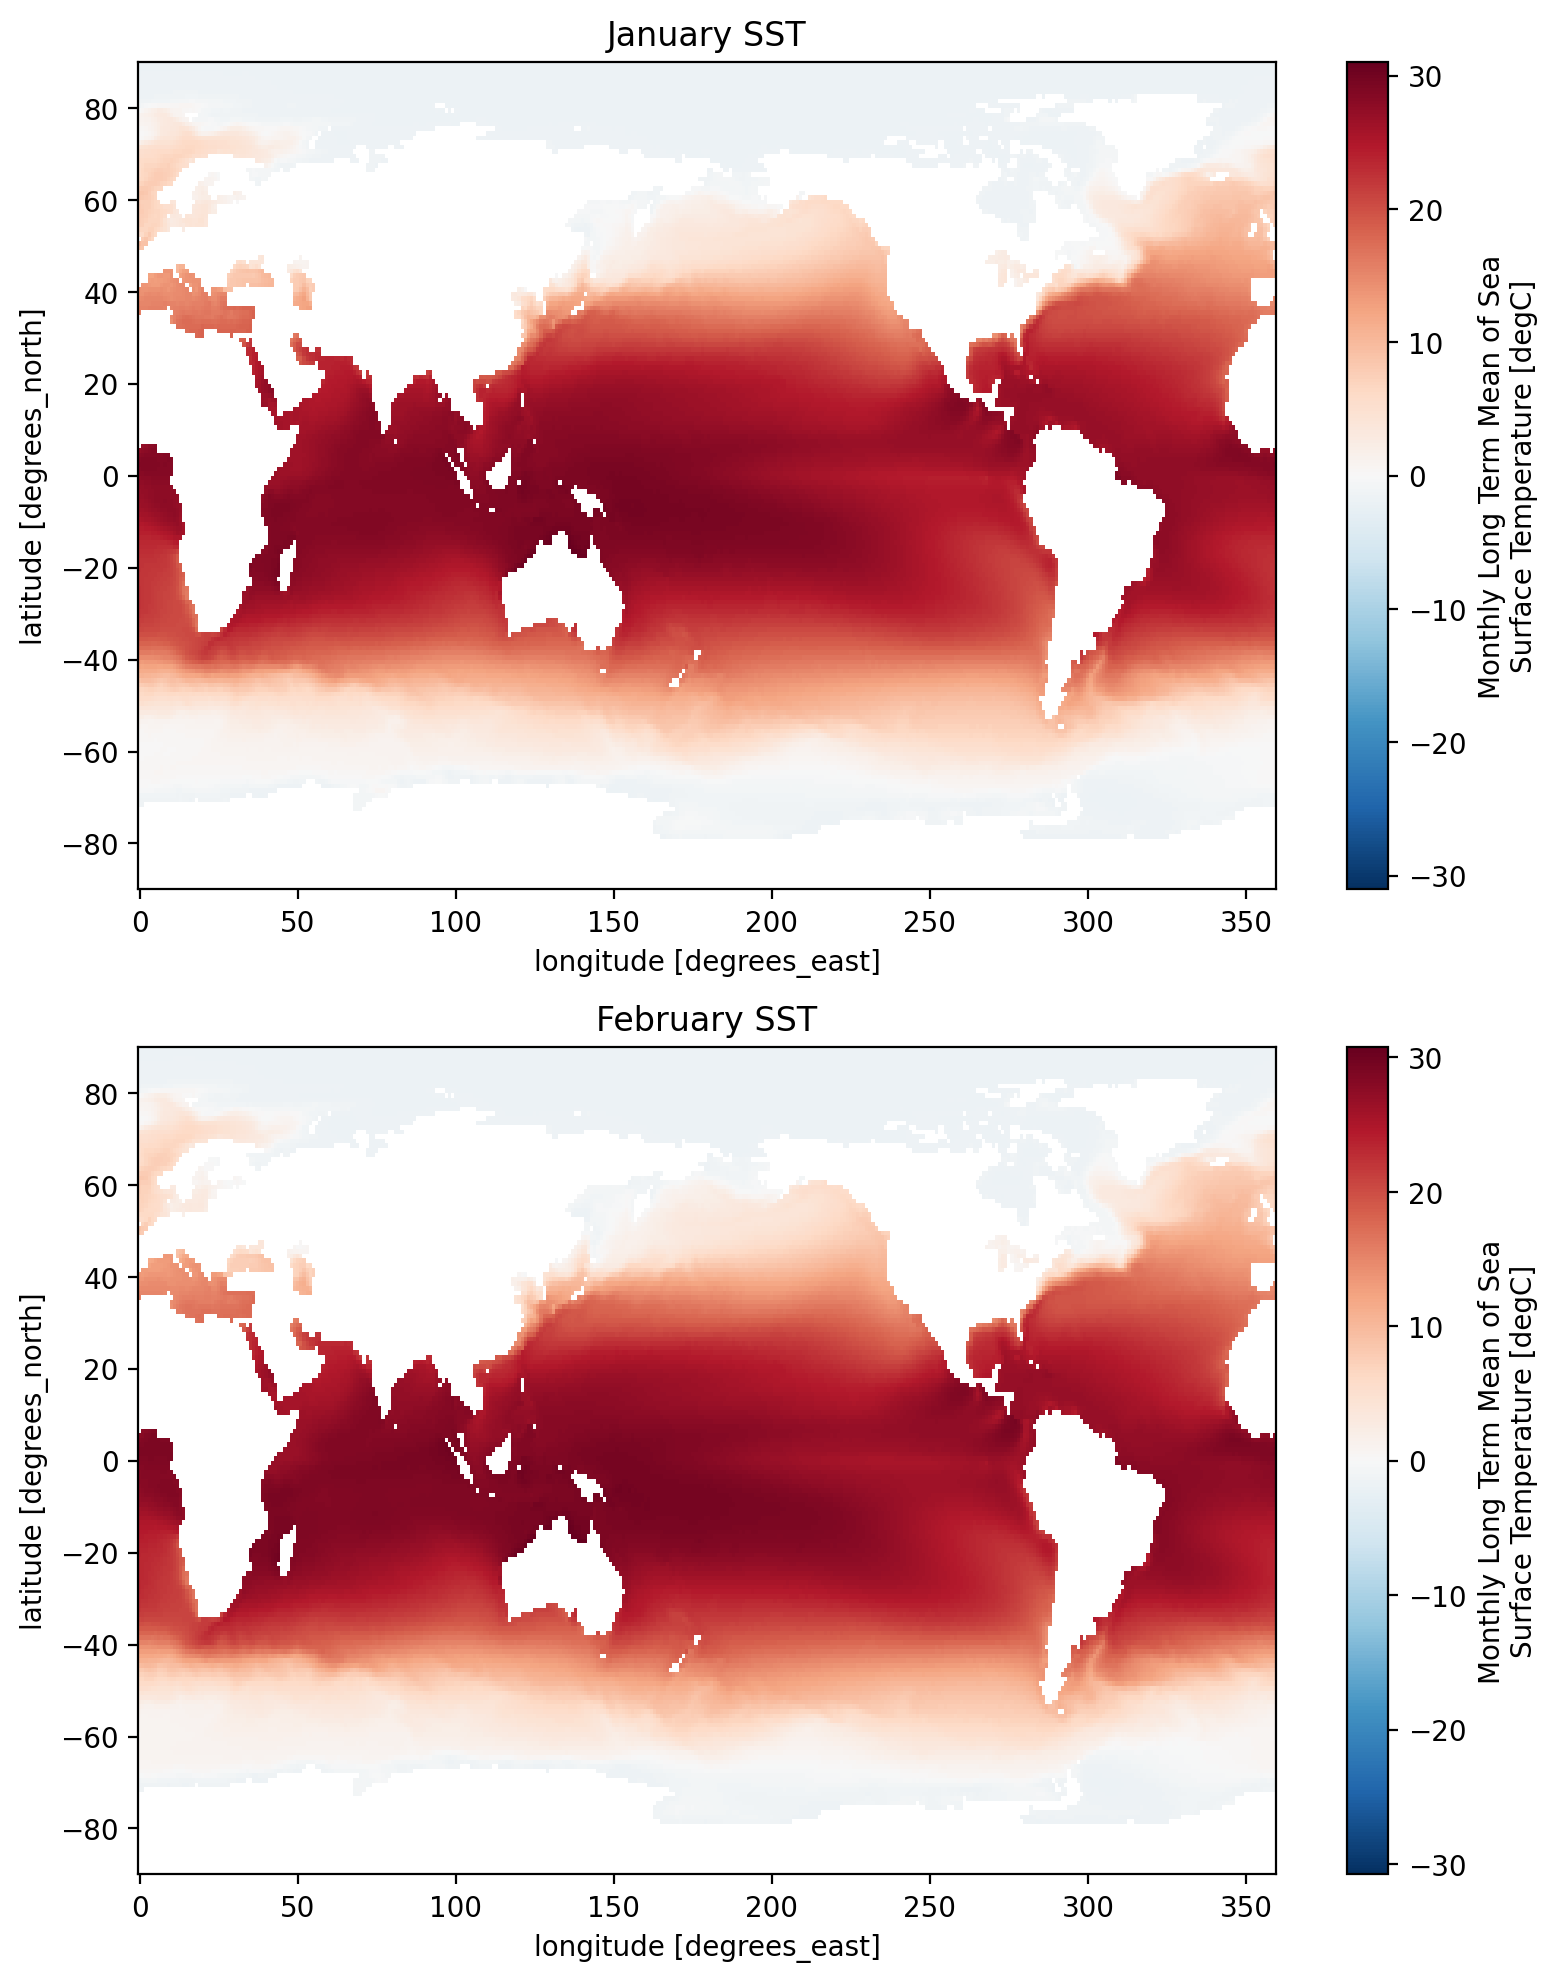

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=1,nrows=2,figsize=(8,10)) ## set up our plotting area
SST.sel(time='1991-01-01').plot(ax=ax1) ## plot January average SST on ax1
SST.sel(time='1991-02-01').plot(ax=ax2) ## plot February average SST on ax2

ax1.set_title('January SST')
ax2.set_title('February SST')

plt.tight_layout() ## make it look nicely spaced!

#### Let's customize this more and change our color map! We will use cmocean's thermal colormap. See more options from cmocean here: https://matplotlib.org/cmocean/. To adjust the colormap in our plots, we pass the `cmap=colormapname` as an argument. To use any of the cmocean colormaps we specify `cmocean.cm.colormapname`.

![](https://matplotlib.org/cmocean/_images/index-1.png)

#### Matplotlib also has many built in options for colormaps (a few examples below but please use this resource for even more: https://matplotlib.org/stable/users/explain/colors/colormaps.html).

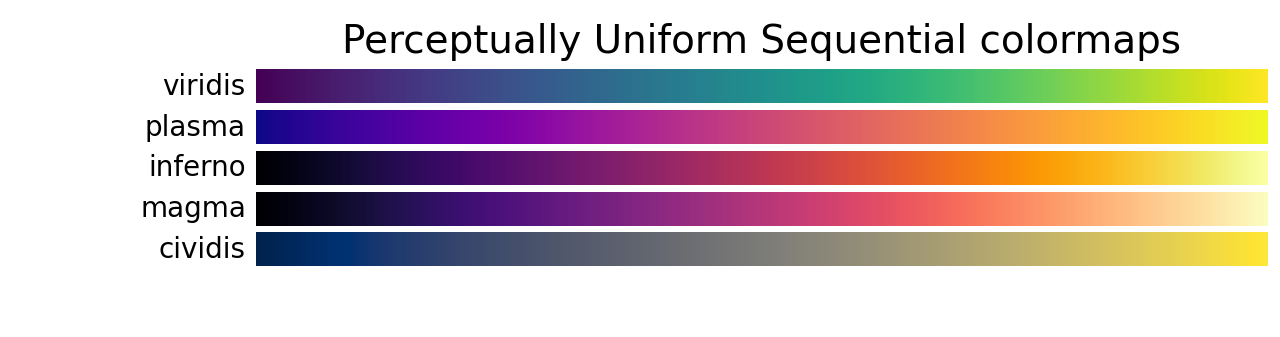
![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_002_2_00x.png)
![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_004_2_00x.png)

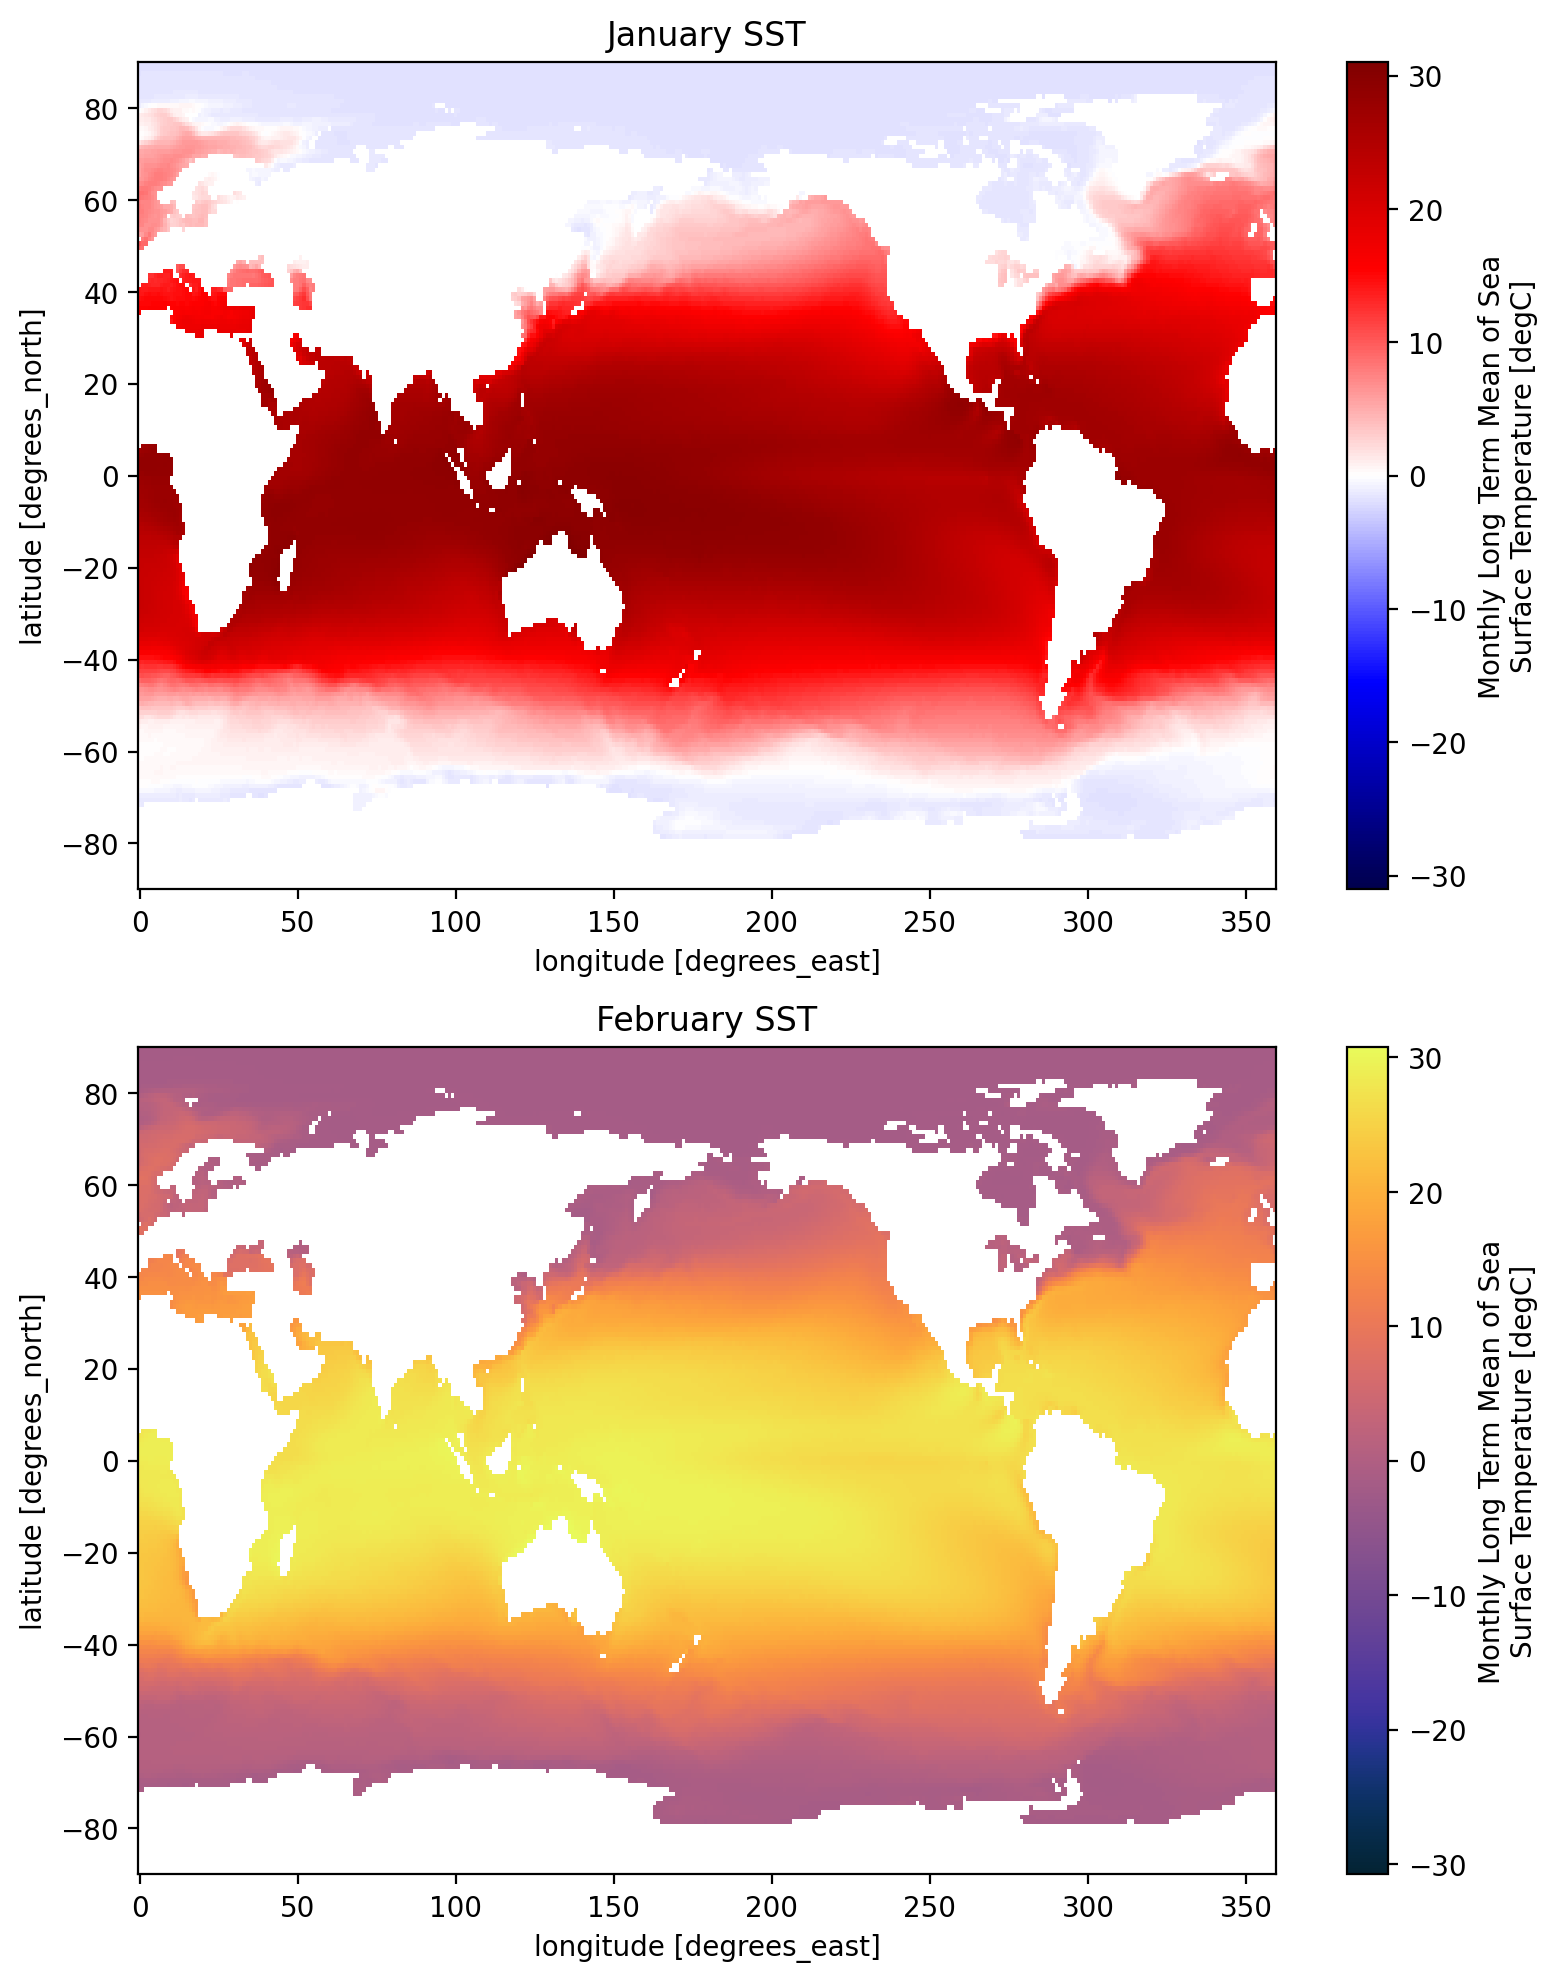

In [11]:
### Here we change our colormap to cmocean.cm.thermal

fig, (ax1, ax2) = plt.subplots(ncols=1,nrows=2,figsize=(8,10)) ## set up our plotting area
SST.sel(time='1991-01-01').plot(ax=ax1, cmap='seismic') ## plot January average SST on ax1
SST.sel(time='1991-02-01').plot(ax=ax2, cmap=cmocean.cm.thermal) ## plot February average SST on ax2

ax1.set_title('January SST')
ax2.set_title('February SST')

plt.tight_layout() ## make it look nicely spaced!

#### Hmmmm --- I still don't like the look of that, lets fix the maximum and mininum on our color bars so that all the features are easier to see. We can do this by passing our `.plot()` method arguments `vmin=integervalue, vmax=integervalue`.

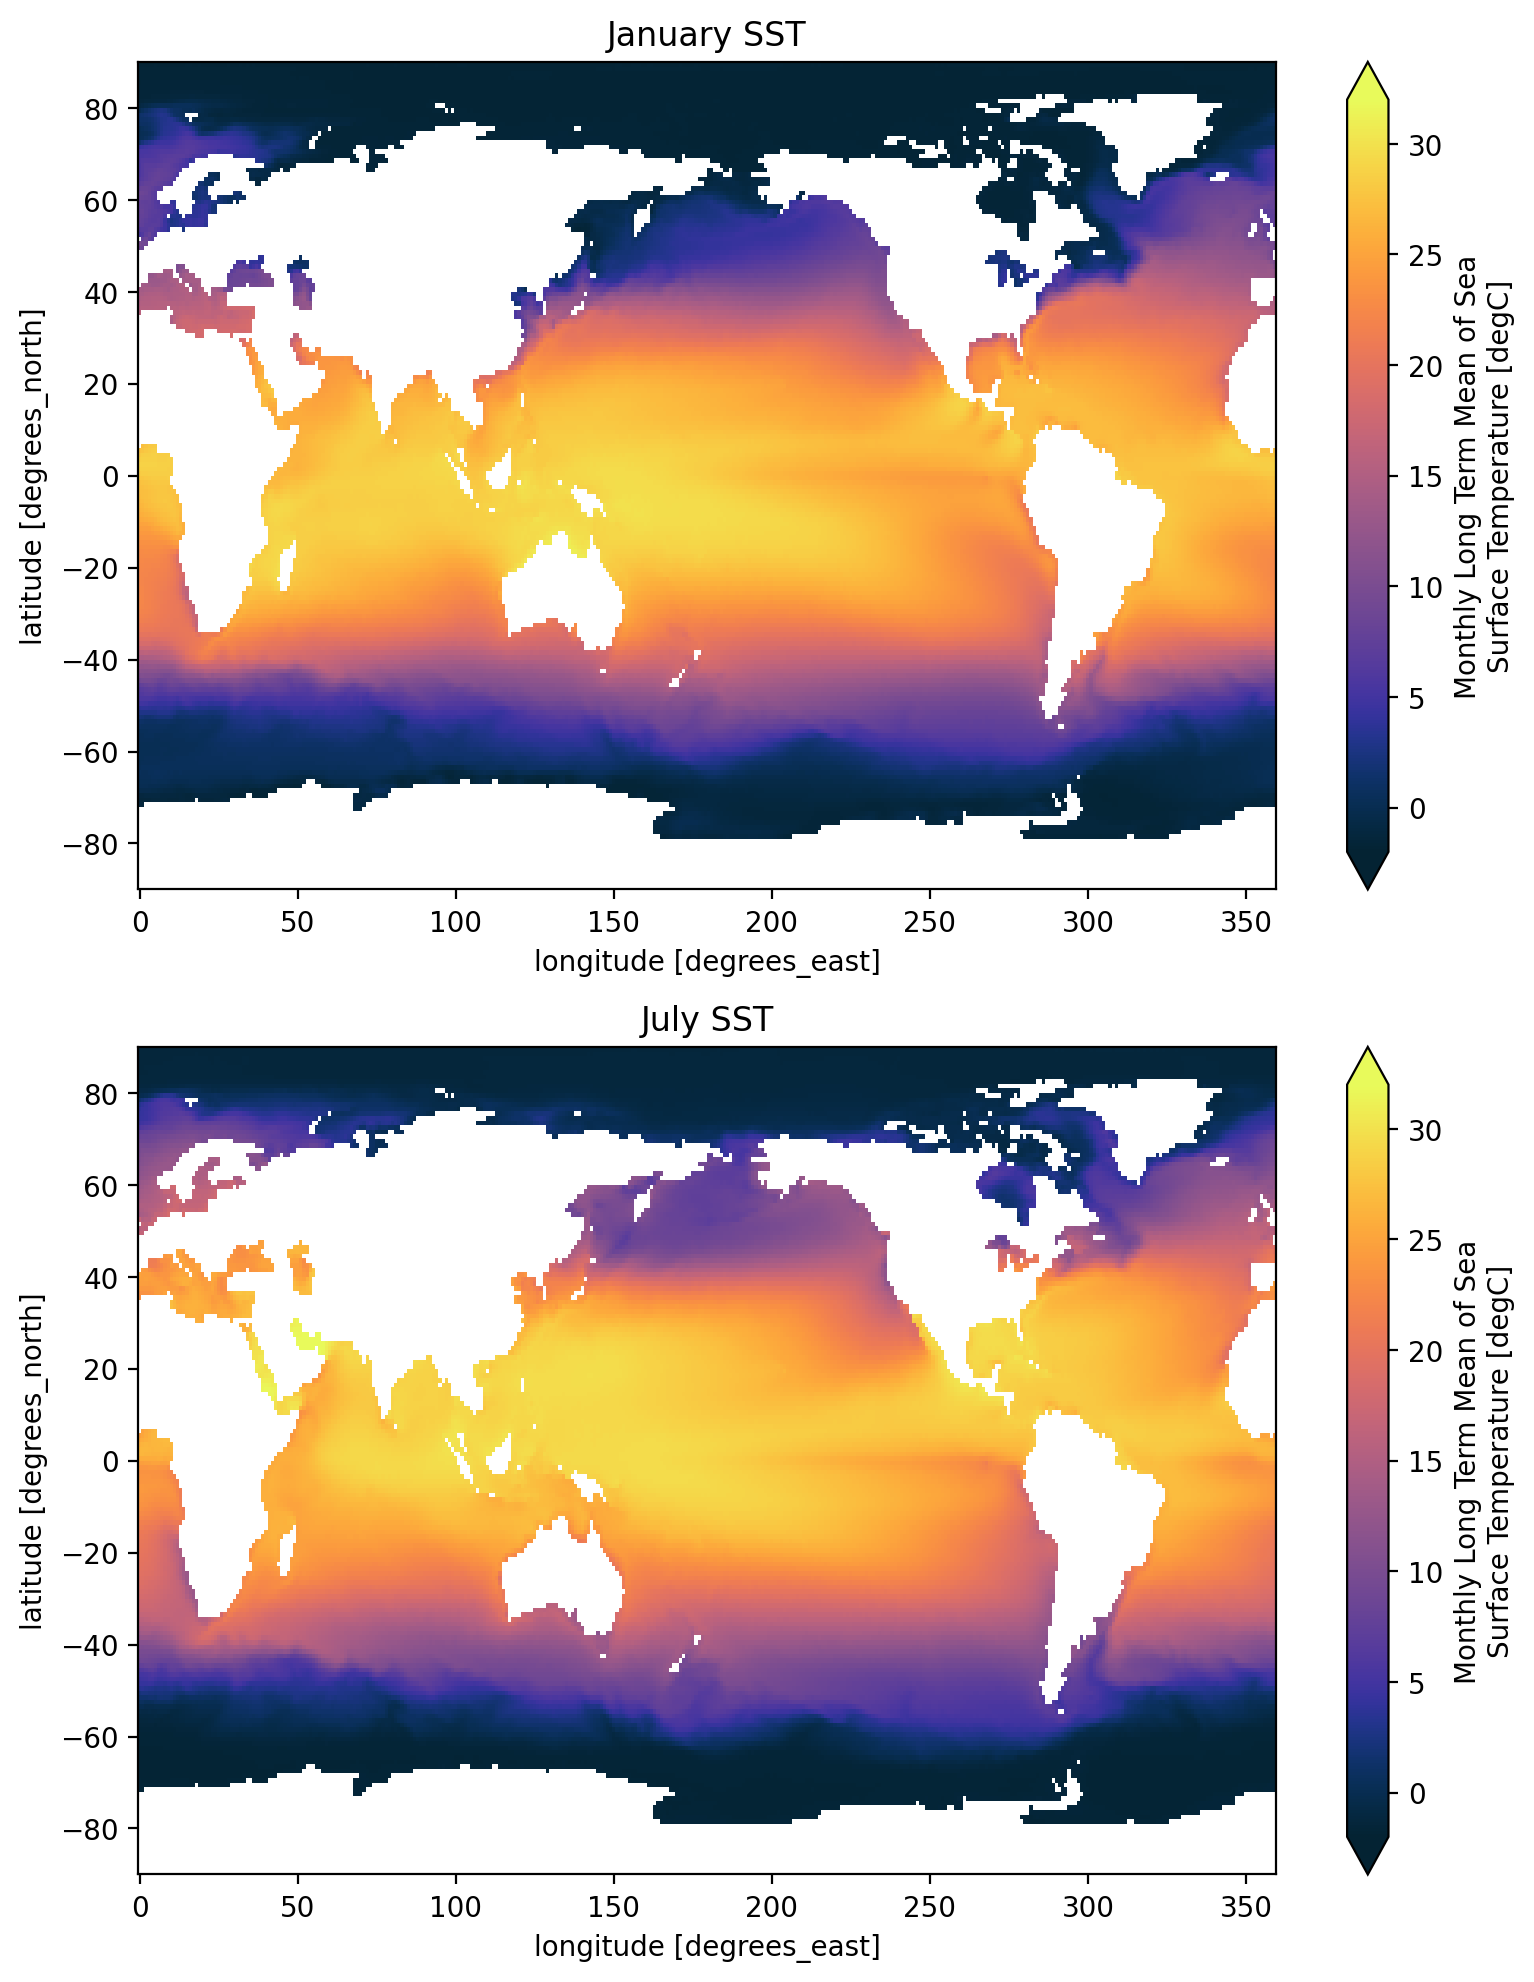

In [14]:
### Here we specify vmin=, and vmax=, to change the min and max of the colorbar.

fig, (ax1, ax2) = plt.subplots(ncols=1,nrows=2,figsize=(8,10)) ## set up our plotting area
SST.sel(time='1991-01-01').plot(ax=ax1, cmap=cmocean.cm.thermal, vmin=-2,vmax=32, extend='both') ## plot January average SST on ax1
SST.sel(time='1991-07-01').plot(ax=ax2, cmap=cmocean.cm.thermal, vmin=-2,vmax=32, extend='both') ## plot February average SST on ax2

ax1.set_title('January SST')
ax2.set_title('July SST')

plt.tight_layout() ## make it look nicely spaced!

#### OK, all the plots we've made so far are cylindrical equidistant maps ... but to make our plots publication ready we should use a real map projection and add some details ...

### Here comes Cartopy!!

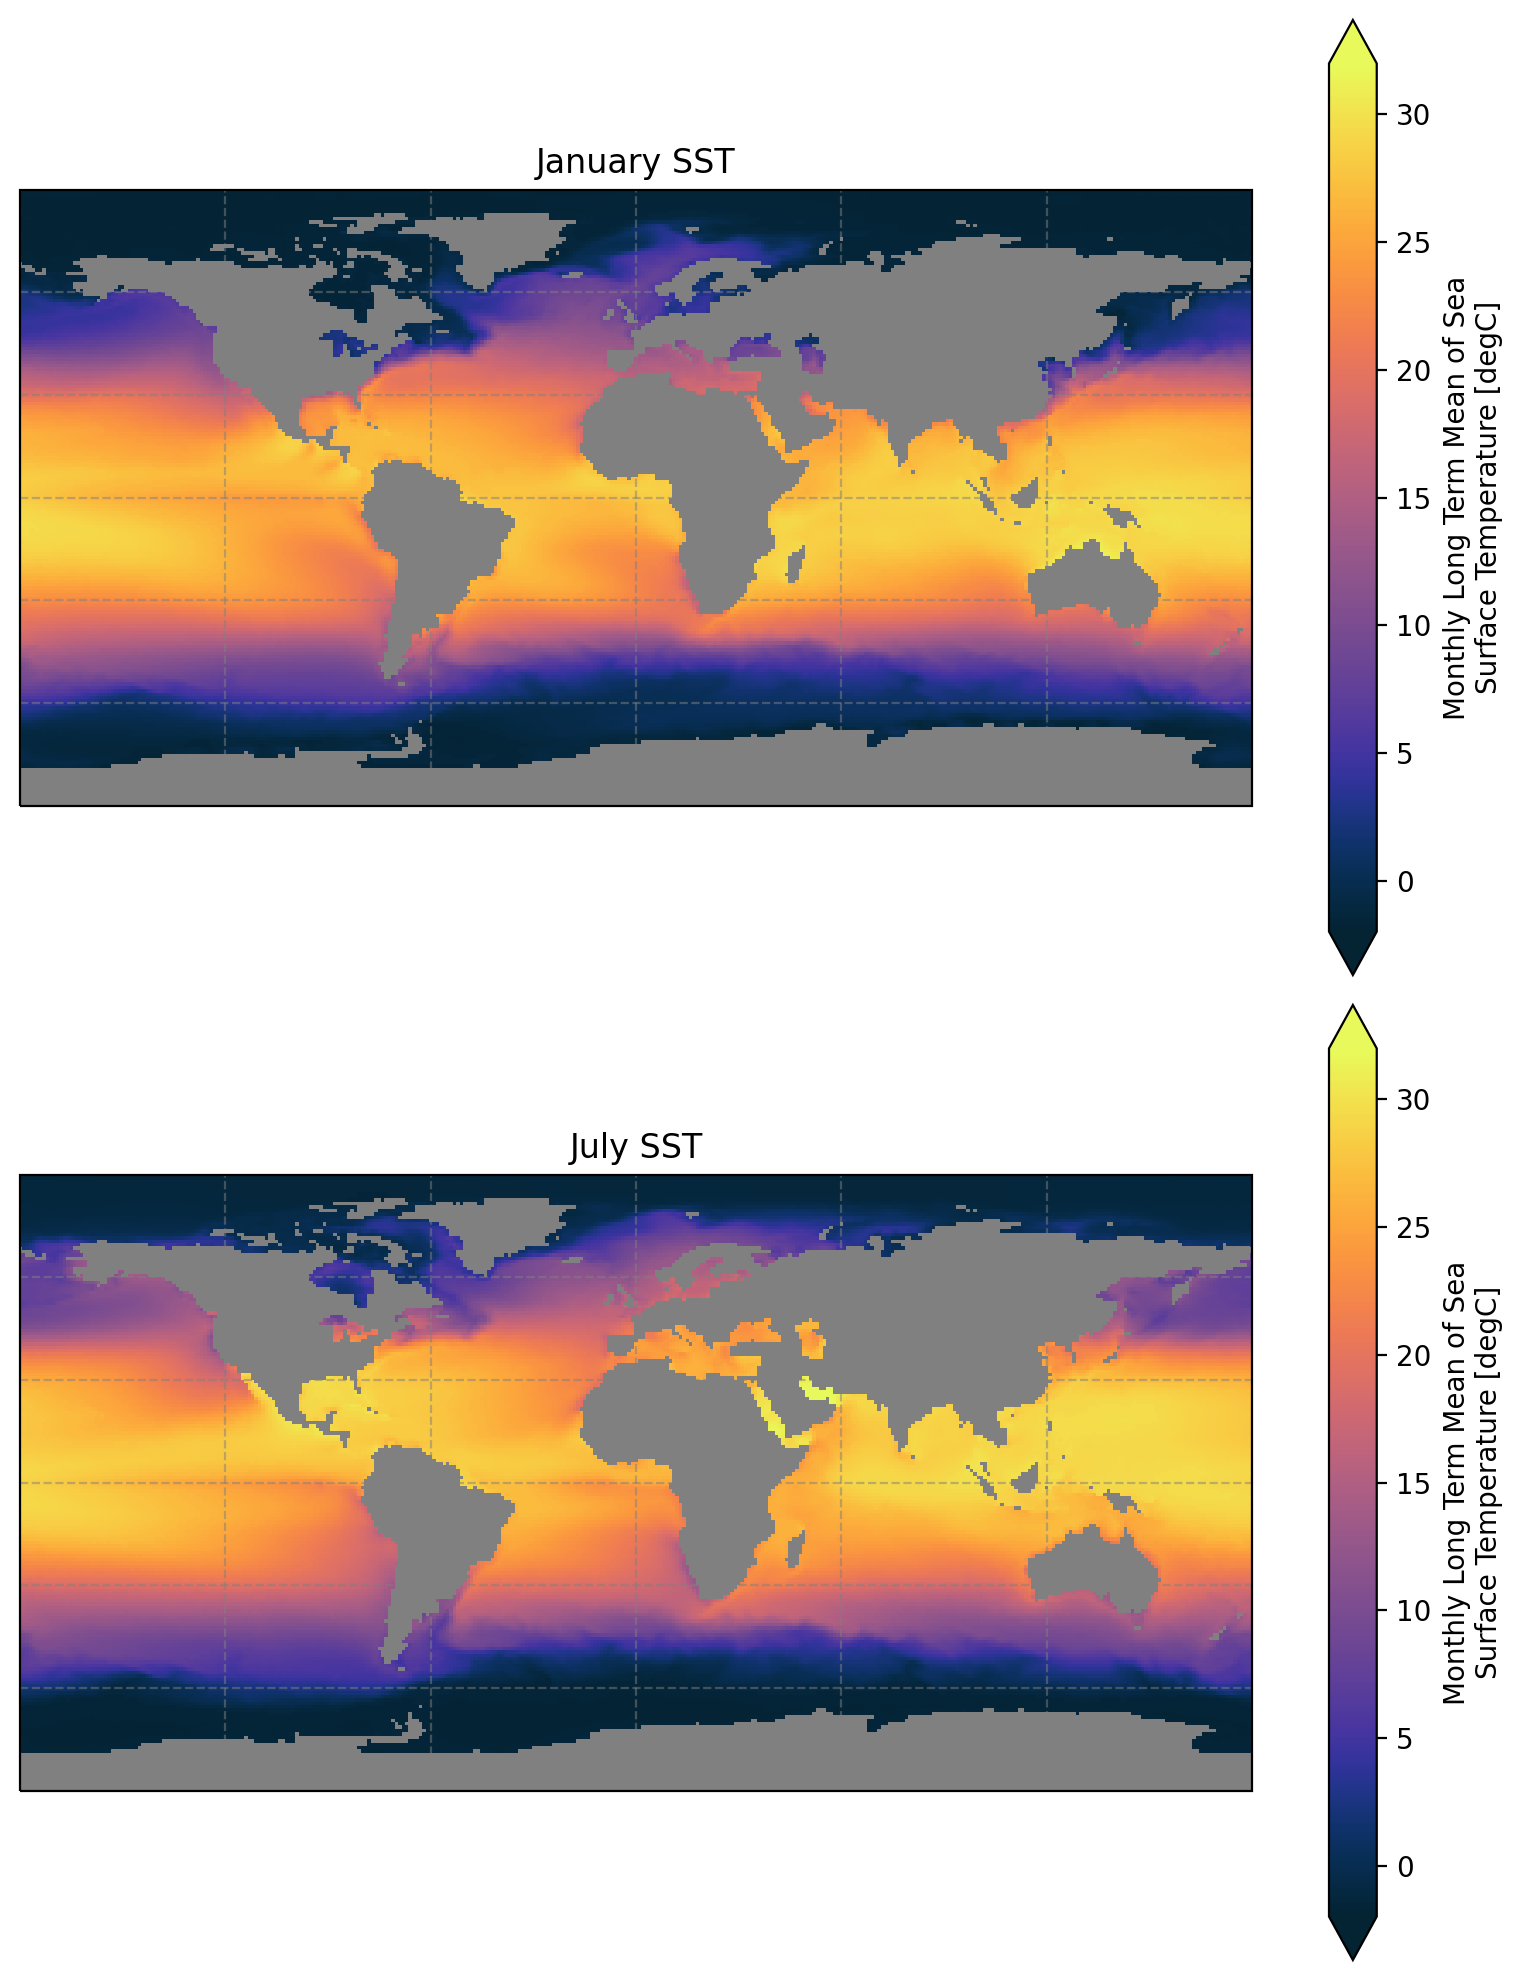

In [15]:
### rememeber we imported cartopy.crs as ccrs (we will do it here again just to remind you)
import cartopy.crs as ccrs

### here we define a dictionary of keyword arguments to customize our plot.
### we define our projection we want to use, and we say that we 
### want to shade all NaN values grey (in this case this is values over land!)

subplot_kws=dict(projection=ccrs.PlateCarree(),
                 facecolor='grey')

### set up our figure settings
fig, (ax1, ax2) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(8,10),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
SST.sel(time='1991-01-01').plot(ax=ax1, 
                                cmap=cmocean.cm.thermal, 
                                vmin=-2,vmax=32, extend='both',
                                transform=ccrs.PlateCarree())

SST.sel(time='1991-07-01').plot(ax=ax2, 
                                cmap=cmocean.cm.thermal, 
                                vmin=-2,vmax=32,extend='both',
                                transform=ccrs.PlateCarree())

## customize our subplots
ax1.set_title('January SST')
ax2.set_title('July SST')

plt.tight_layout() ## make it look nicely spaced!

### add some gridlines 
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

#### Okay lets play around with projections! Examples of different projections that are possible with Cartopy can be found here:
https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

#### In each case, we will be changing out projections by adjusting the projection we defined in our subplot_kws: here we change to `projection=ccrs.Robinson()`.

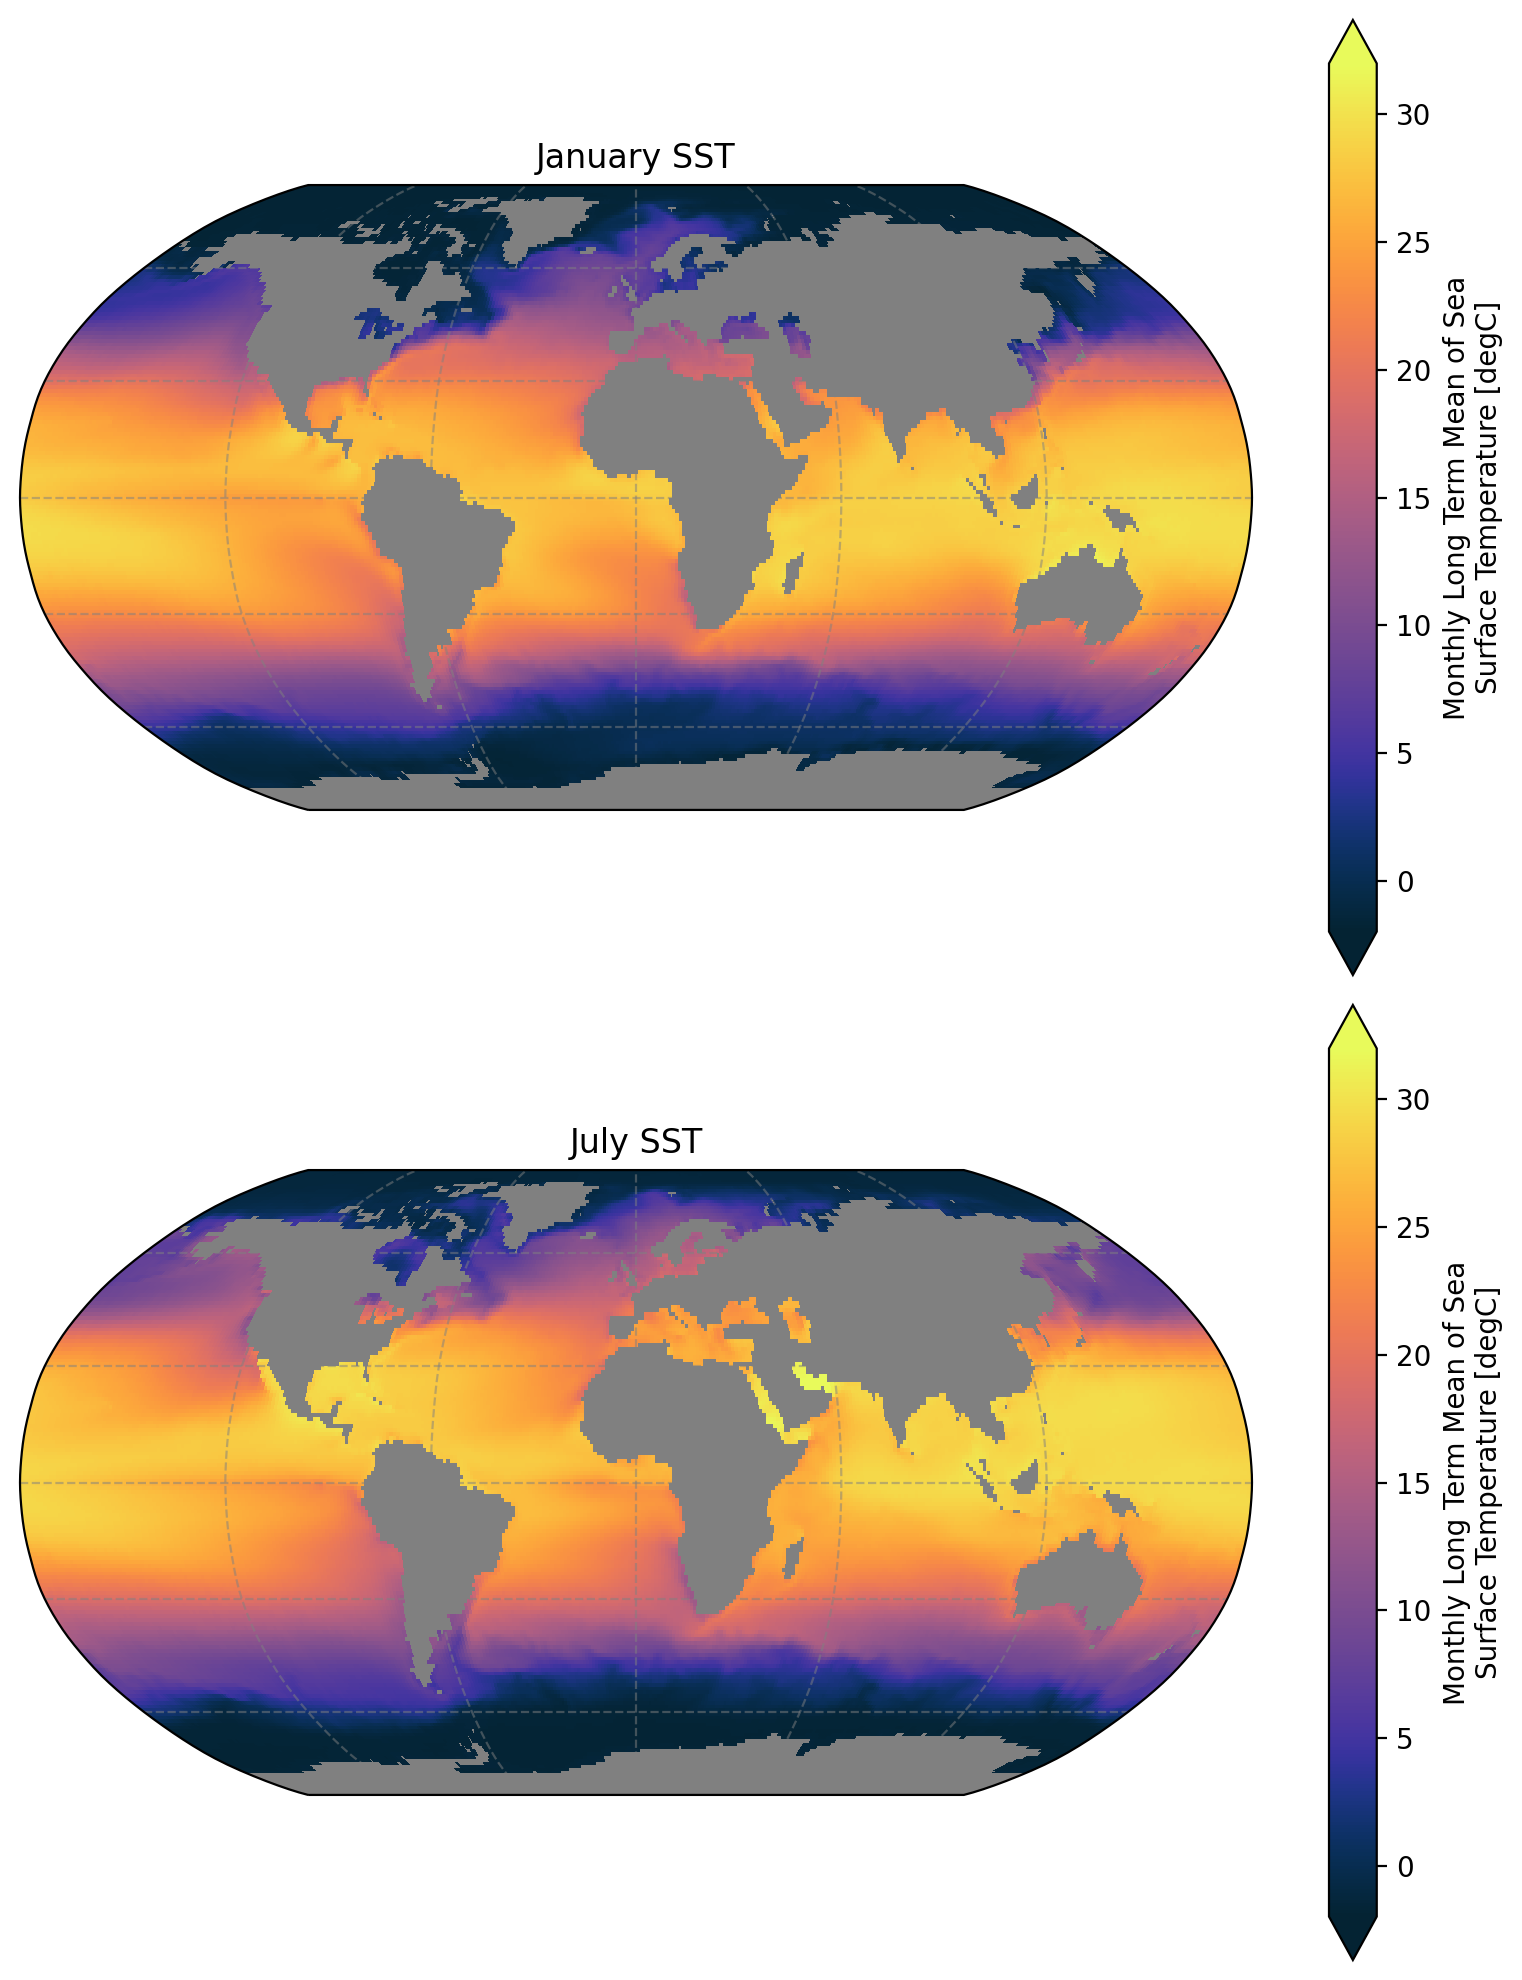

In [16]:
### remember we imported cartopy.crs as ccrs (we will do it here again just to remind you)
import cartopy.crs as ccrs

### here we define a dictionary of keyword arguments to customize our plot.
### we define our projection we want to use, and we say that we 
### want to shade all NaN values grey (in this case this is values over land!)

subplot_kws=dict(projection=ccrs.Robinson(),
                 facecolor='grey')

### set up our figure settings
fig, (ax1, ax2) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(8,10),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
SST.sel(time='1991-01-01').plot(ax=ax1, 
                                cmap=cmocean.cm.thermal, 
                                vmin=-2,vmax=32, extend='both',
                                transform=ccrs.PlateCarree())

SST.sel(time='1991-07-01').plot(ax=ax2, 
                                cmap=cmocean.cm.thermal, 
                                vmin=-2,vmax=32,extend='both',
                                transform=ccrs.PlateCarree())

## customize our subplots
ax1.set_title('January SST')
ax2.set_title('July SST')

plt.tight_layout() ## make it look nicely spaced!

### add some gridlines 
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

#### We can change the central longitude so that our oceans are not split up by passing our projection definition an argument of `central_longitude=integer`. `central_longitude=-160` will put the central Pacific basin in center of our plot.

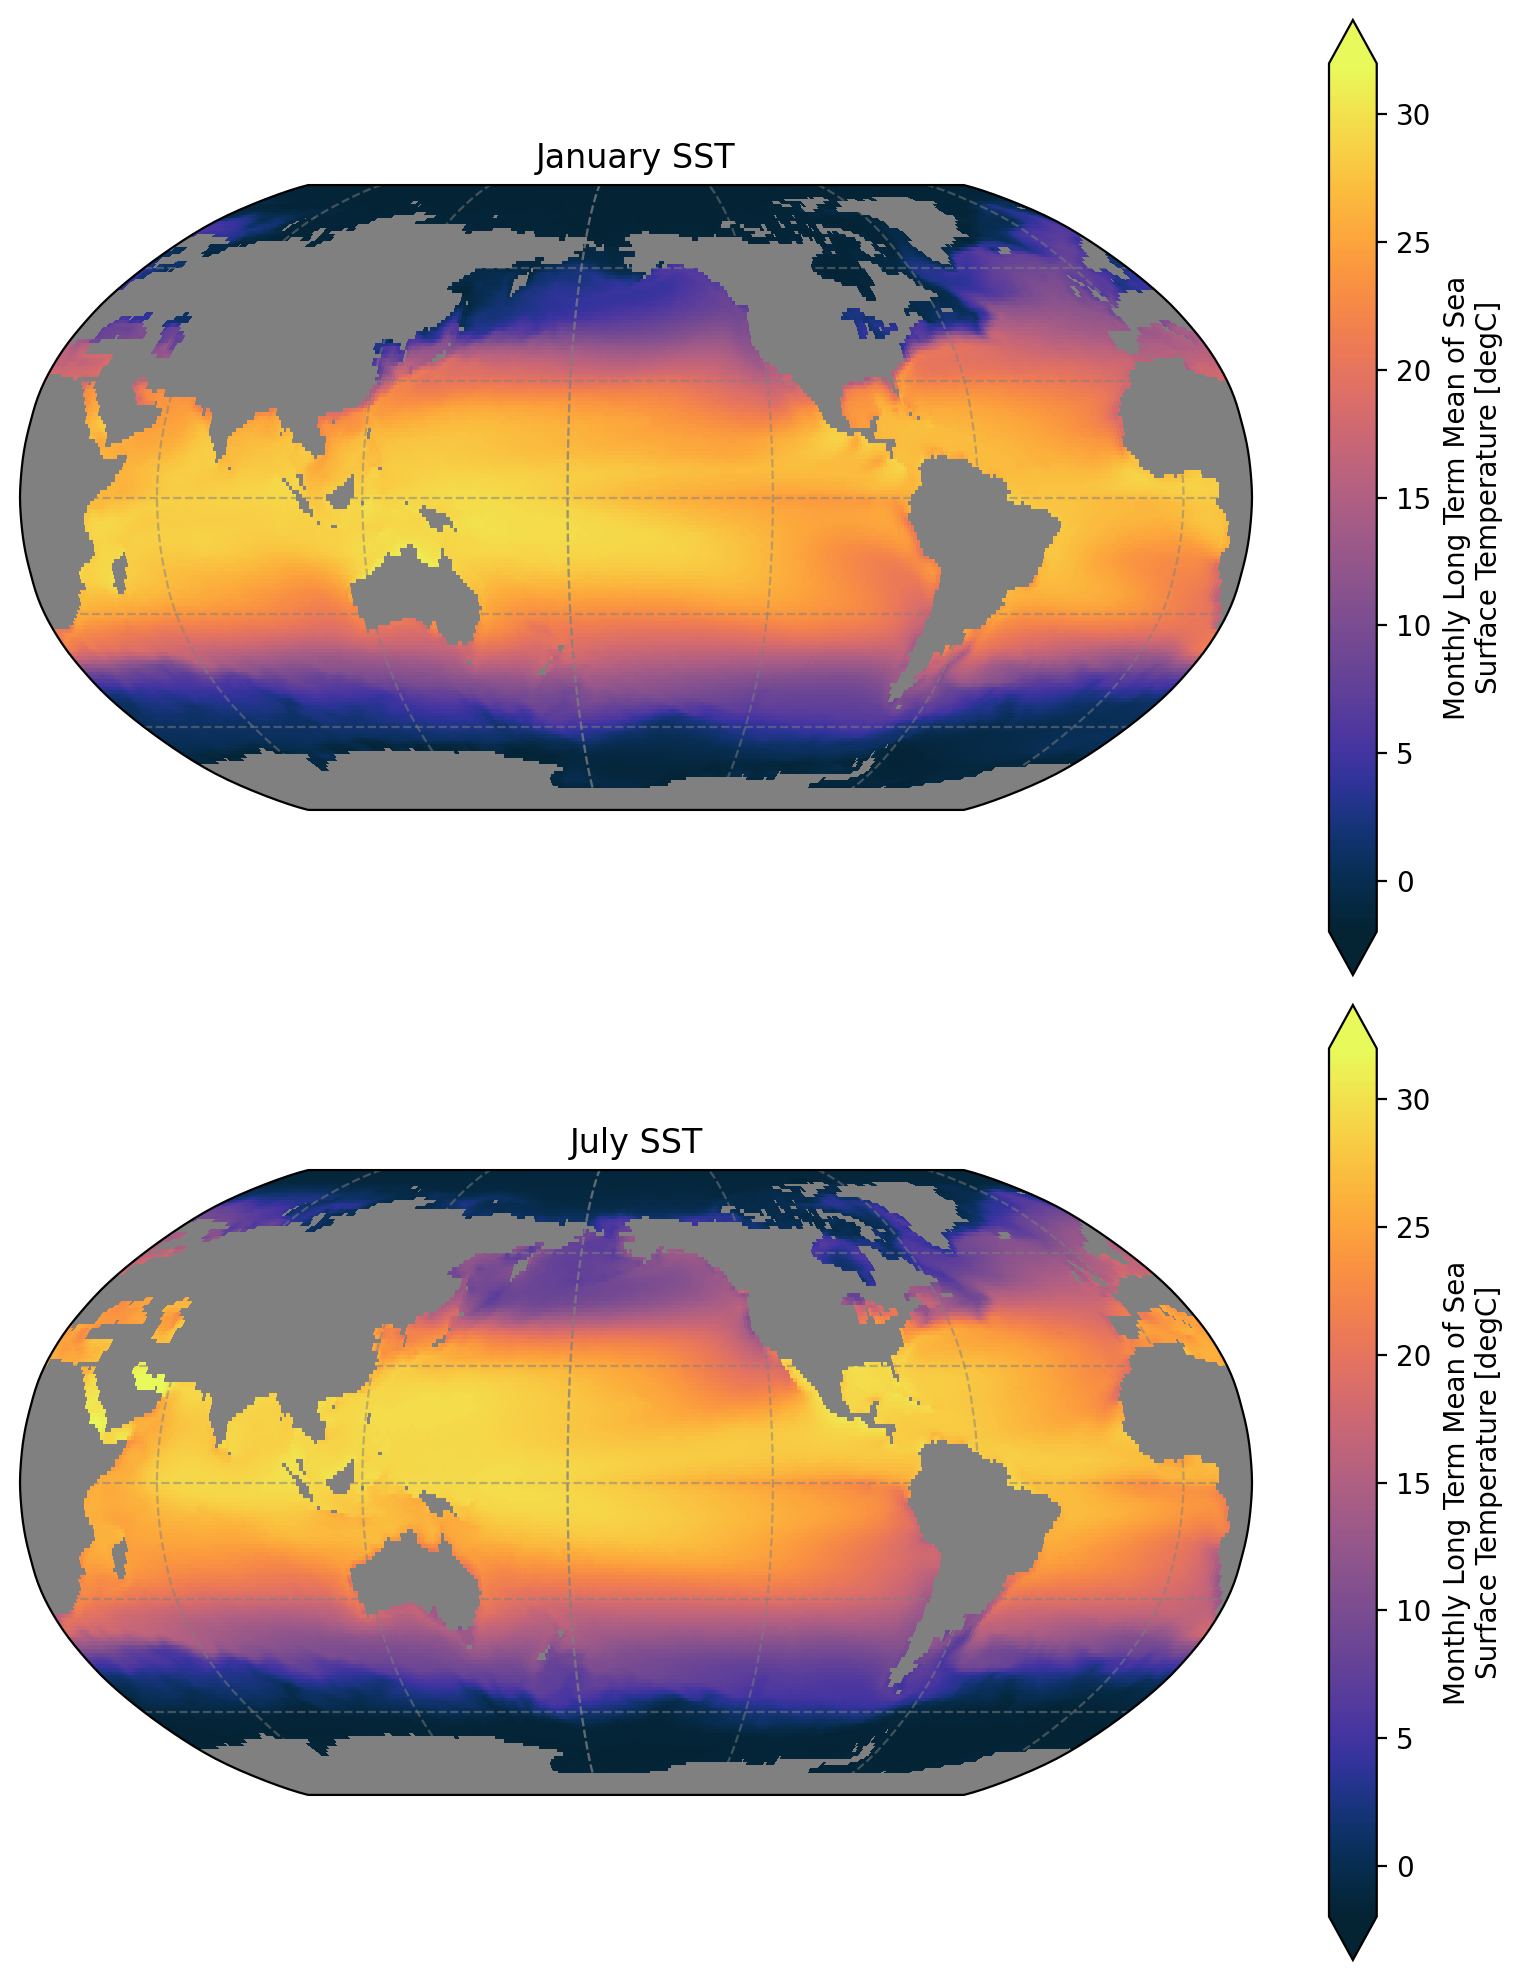

In [17]:
subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-160),
                 facecolor='grey')

### set up our figure settings
fig, (ax1, ax2) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(8,10),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
SST.sel(time='1991-01-01').plot(ax=ax1, 
                                cmap=cmocean.cm.thermal, 
                                vmin=-2,vmax=32, extend='both',
                                transform=ccrs.PlateCarree())

SST.sel(time='1991-07-01').plot(ax=ax2, 
                                cmap=cmocean.cm.thermal, 
                                vmin=-2,vmax=32,extend='both',
                                transform=ccrs.PlateCarree())

## customize our subplots
ax1.set_title('January SST')
ax2.set_title('July SST')

plt.tight_layout() ## make it look nicely spaced!

### add some gridlines 
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

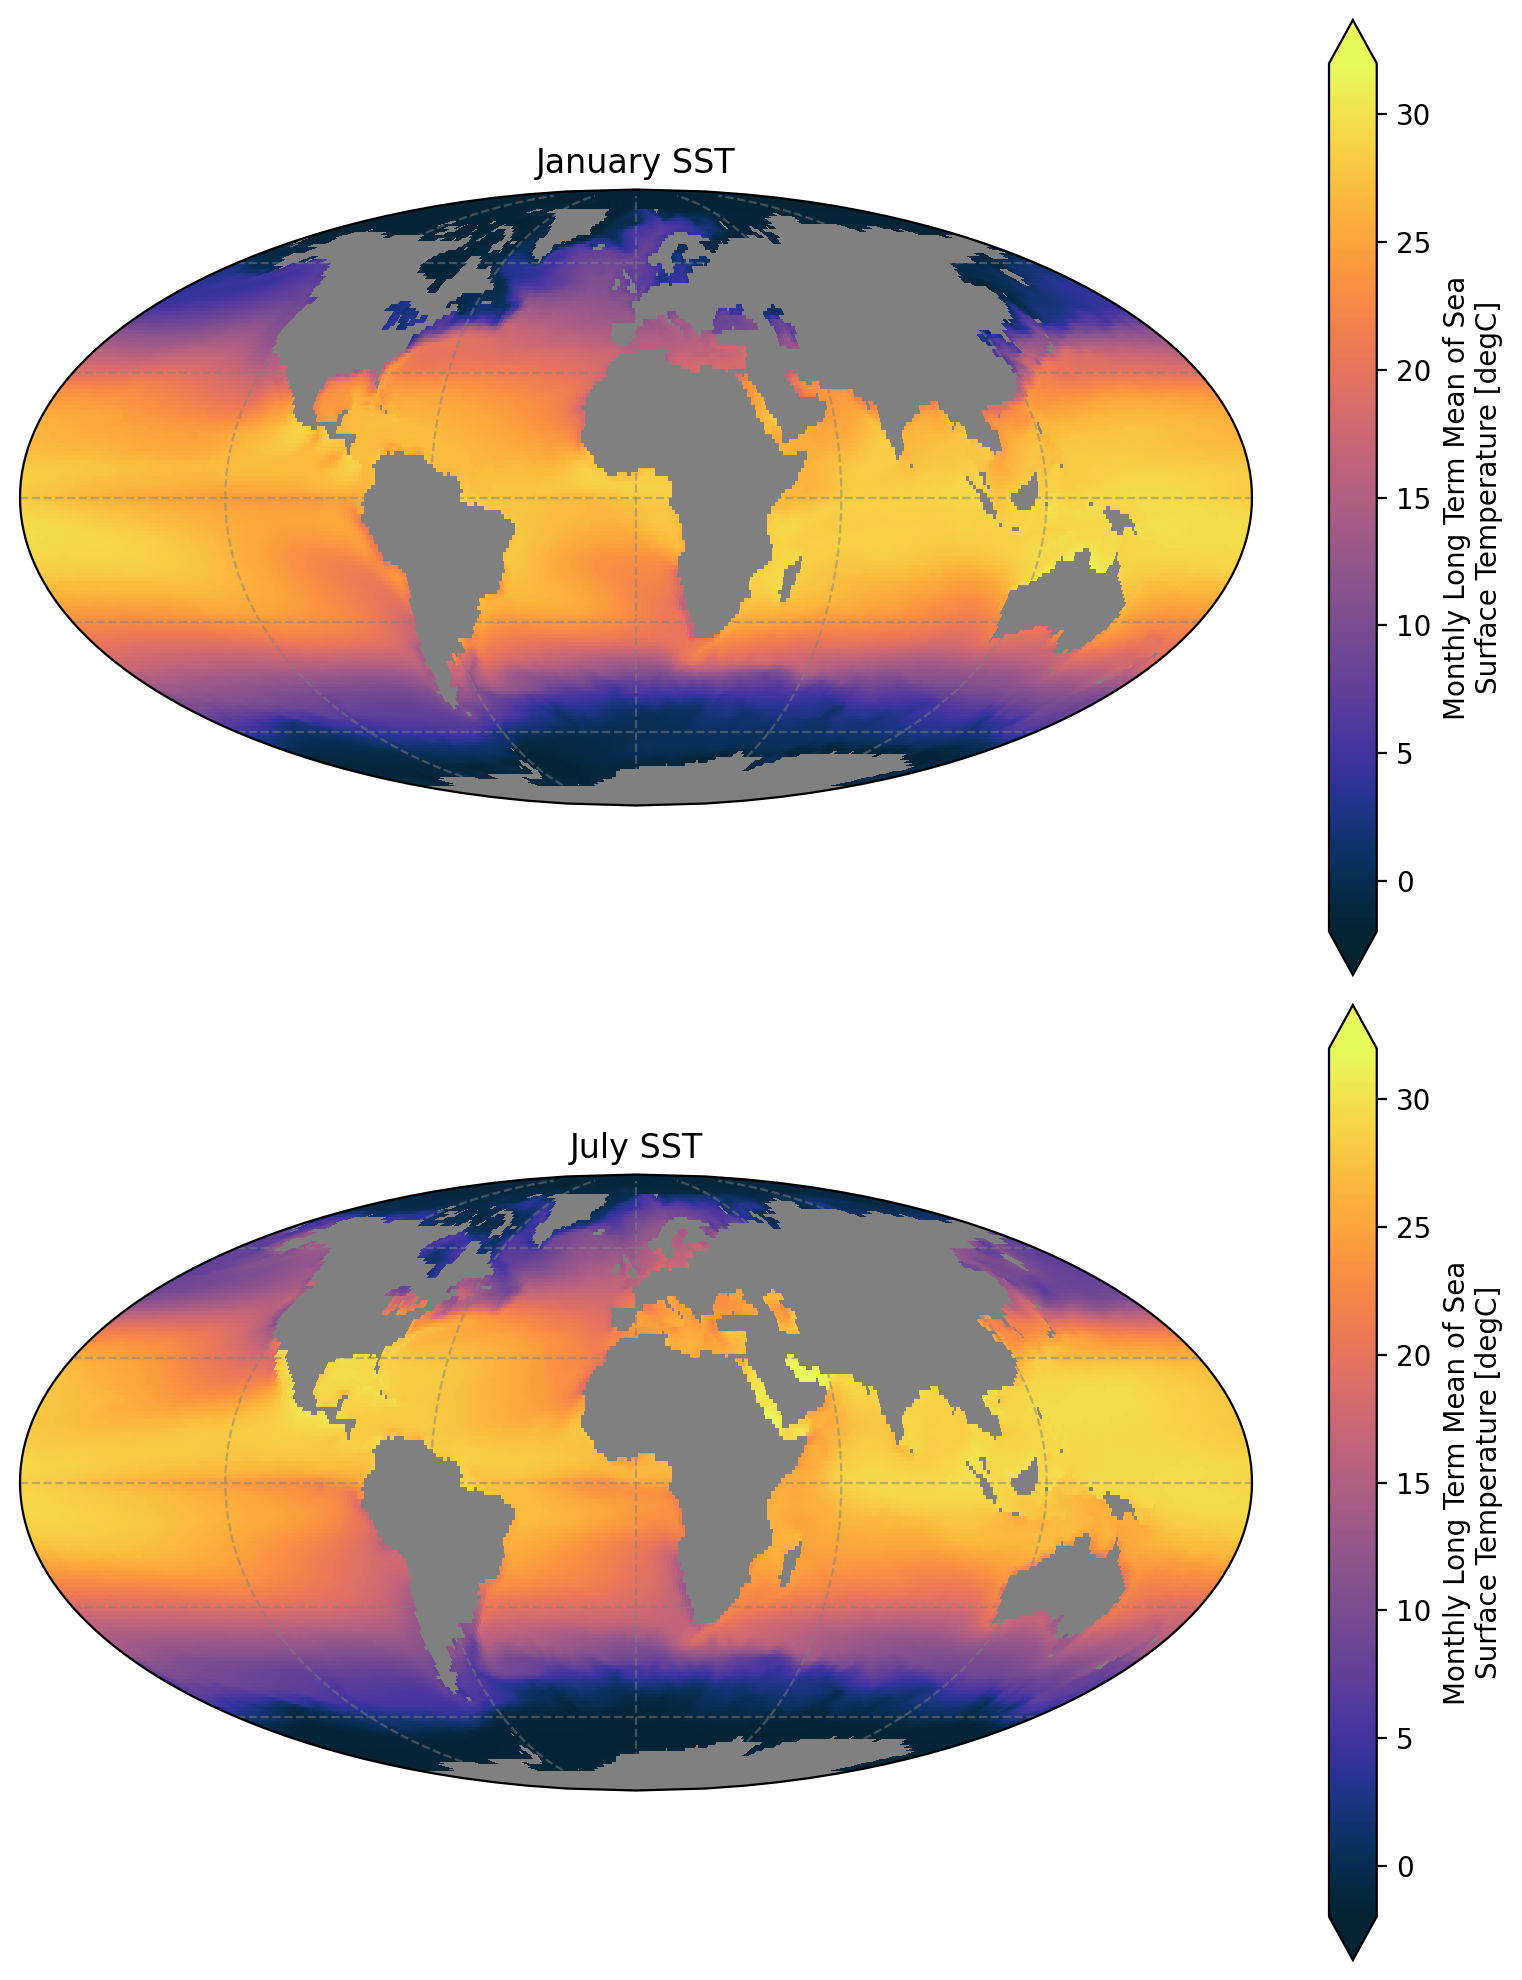

In [18]:
subplot_kws=dict(projection=ccrs.Mollweide(),
                 facecolor='grey')

### set up our figure settings
fig, (ax1, ax2) = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(8,10),
                               subplot_kw=subplot_kws) ## set up our plotting area

### plot our data
SST.sel(time='1991-01-01').plot(ax=ax1, 
                                cmap=cmocean.cm.thermal, 
                                vmin=-2,vmax=32, extend='both',
                                transform=ccrs.PlateCarree())

SST.sel(time='1991-07-01').plot(ax=ax2, 
                                cmap=cmocean.cm.thermal, 
                                vmin=-2,vmax=32,extend='both',
                                transform=ccrs.PlateCarree())

## customize our subplots
ax1.set_title('January SST')
ax2.set_title('July SST')

plt.tight_layout() ## make it look nicely spaced!

### add some gridlines 
ax1.gridlines(color='grey', alpha=0.5, linestyle='--')
ax2.gridlines(color='grey', alpha=0.5, linestyle='--')

#### <span style="color:red"> We've just covered the basics here, but use the cells below to play around with the parameters and different colormaps / scales / projections to create different visualizations.

#### You now have all the skills needed to complete the Unit 5 mini project which will focus on investigating climate change in our Polar regions using some of the same datasets that Dr. Zachary Labe presented in his guest lecture.

#### <span style="color:red"> Do not forget that you must have answers for all the red cells in this notebook and add and push it to GitHub when complete!!

#### Shutting down your notebook (__don't do this yet!!__ These are just instructions for when class is over).
#### Before shutting down, save your notebook with the disc icon in the Notebook toolbar. Go to the the File menu and click Shut Down to close the browser table and Jupyter Lab itself.